In [10]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

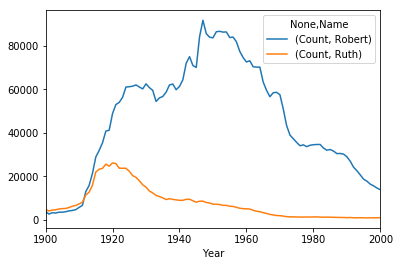

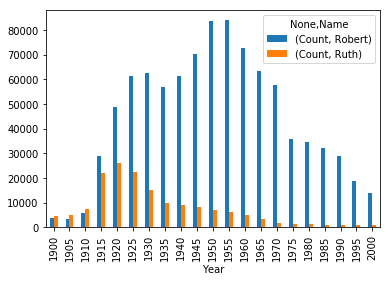

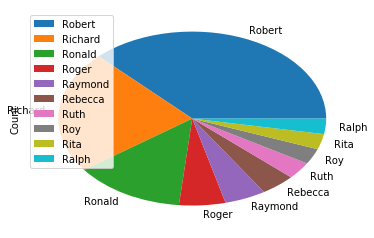

In [52]:
def get_file_path_by_year(year, source):
    return os.path.join(source, 'yob{}.txt'.format(year))


def get_name_count_list(source, name_list, start_year, finish_year, interval=1):
    data = {}
    for year in range(start_year, finish_year + 1, interval):
        file_path = get_file_path_by_year(year, source)
        file_data = pd.read_csv(file_path, names=['Name', 'Gender', 'Count'])
        file_data_filtered = file_data[file_data['Name'].isin(name_list)].groupby('Name').sum()
        data[year] = file_data_filtered
    data_all = pd.concat(data, names=['Year'])
    return data_all


def get_names_start_with_letter(source, year, letter):
    file_path = get_file_path_by_year(year, source)
    data = pd.read_csv(file_path, names=['Name', 'Gender', 'Count'])
    return data[data['Name'].str.startswith(letter)].groupby('Name').sum()


def get_top_names(names_count, top_count):
    return names_count.sort_values(by='Count', ascending=False).head(top_count)


def main():
    source = 'names'
    name_list = ['Ruth', 'Robert']
    start_year = 1900
    finish_year = 2000
    data = get_name_count_list(source, name_list, start_year, finish_year)
    data.groupby([data.index.get_level_values(0), 'Name']).sum().unstack('Name').plot()
    data = get_name_count_list(source, name_list, start_year, finish_year, interval=5)
    data.groupby([data.index.get_level_values(0), 'Name']).sum().unstack('Name').plot.bar()

    letter = 'R'
    year = 1950
    top_count = 10
    names_count = get_names_start_with_letter(source, year, letter)
    top_data = get_top_names(names_count, top_count)
    top_data.plot.pie(y='Count')


if __name__ == '__main__':
    main()